In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [6]:
breast_cancer = load_breast_cancer()

In [18]:
dir(breast_cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [25]:
# 타겟 이름
breast_cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [23]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [42]:
### Instance 수 : 569개
### Attribute 수 : 30개
### 위스콘신에서 유방암 진단한 데이터셋
###
#### radius : 반지름의 평균
#### texture : 그레이스케일값의 표준편차
### perimeter : 둘레
### area : 면적
### smoothness : 반지름값의 국소적 편차
### compactness : perimeter^2/area-1
### concavity : 등고선의 오목한 부분의 심도
### concave points : 등고선의 오목한 부분 수
### symmetry : 대칭성
### fractal dimension : coastline 근사 - 1
### 평균, 표준편차, 가장큰3개의 평균

### 10개 * 3
### Malignant : 악성의
# Genign : 양성의(유순한)`

In [54]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
y_pred = knn.predict(X_test)

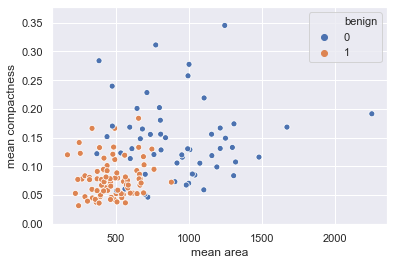

In [80]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)
plt.show()

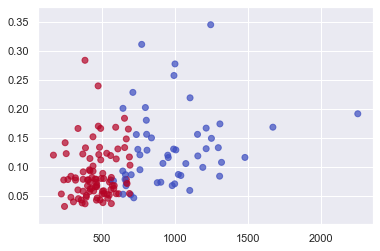

In [86]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)
plt.show()

In [92]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]], dtype=int64)